In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb


In [169]:
df = pd.read_csv('application_train.csv')

In [170]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
A = dict(df.isnull().sum())
print(A)

{'SK_ID_CURR': 0, 'TARGET': 0, 'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 12, 'AMT_GOODS_PRICE': 278, 'NAME_TYPE_SUITE': 1292, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 202929, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 96391, 'CNT_FAM_MEMBERS': 2, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 0, 'ORGANIZATION_TYPE': 0, 'EXT_SOURCE_1': 1733

In [173]:
for i in A:
    if A[i] > 10000:
        del df[i]
#まだしないほうがいい
aa = list(df.columns)

In [174]:
gender_mapping = {'M':0, 'F':1}
gender_mapping

{'M': 0, 'F': 1}

In [176]:

df['CODE_GENDER'] = df['CODE_GENDER'].map(gender_mapping)
df
df.interpolate(method='linear')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,NaN,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,NaN,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,NaN,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,NaN,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,NaN,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,NaN,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,Cash loans,NaN,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,1,0,0,0,0,0,0,0
7,100010,0,Cash loans,NaN,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,Cash loans,NaN,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,Revolving loans,NaN,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,0.0,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,NaN,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


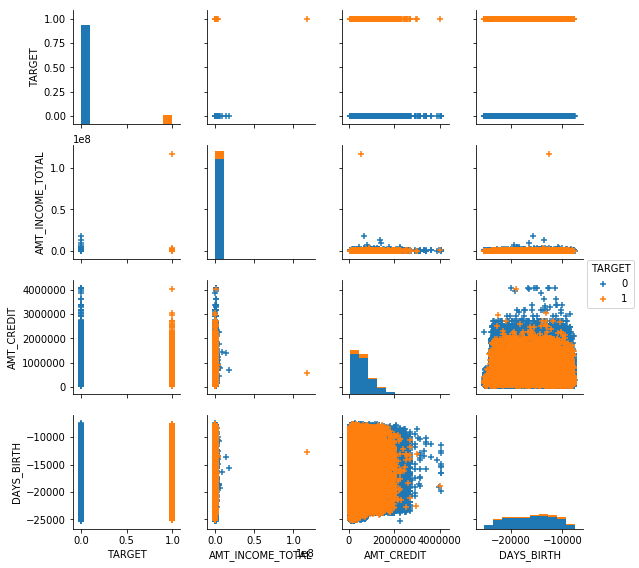

In [178]:
df_pickup = df.loc[:, ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH']]
sns.pairplot(df_pickup, size=2.0, hue='TARGET', markers='+')
plt.show()

In [179]:
X = df.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH']].values
y = df.loc[:, ['TARGET']].values
y = y.reshape(-1)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)


In [182]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [183]:
lr.predict_proba(X_test)

array([[0.94286741, 0.05713259],
       [0.9333352 , 0.0666648 ],
       [0.93572362, 0.06427638],
       ...,
       [0.94480619, 0.05519381],
       [0.92756481, 0.07243519],
       [0.9490775 , 0.0509225 ]])

In [184]:
print('train acc: %.3f' % lr.score(X_train, y_train))
print('test acc: %.3f' % lr.score(X_test, y_test))
#また学習させる

train acc: 0.919
test acc: 0.920


In [185]:
df2 = pd.read_csv('application_test.csv')

In [186]:
df2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [188]:
ab = list(df2.columns)
for j in ab:
    if j not in aa:
        del df2[j]
df2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,0,0,0,0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0,0,0,0,0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,0,0
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0,0,0,0,0,0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0,0,0,0,0,0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0,0,0,0,0,0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0,0,0,0,0,0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
X = df2.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH']].values

In [195]:
X.shape

(48744, 3)

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [197]:
X_std.shape

(48744, 3)

In [198]:
a = lr.predict_proba(X_std)
print(a)

[[0.93678318 0.06321682]
 [0.92547953 0.07452047]
 [0.94131351 0.05868649]
 ...
 [0.91673781 0.08326219]
 [0.90927262 0.09072738]
 [0.90613189 0.09386811]]


In [199]:
B = []
for i in range(len(a)):
    B.append(a[i][0])
    

In [200]:
B

[0.9367831802034694,
 0.9254795335004055,
 0.9413135066366483,
 0.9322646470033596,
 0.9082739528569781,
 0.9405269837370263,
 0.9243436688071094,
 0.873158163450144,
 0.8999229673391375,
 0.8754844847661404,
 0.9537365769650415,
 0.9135828005917458,
 0.8953720999878403,
 0.9350962697552494,
 0.8905381472940324,
 0.9033341298048848,
 0.9344993528569995,
 0.9483749478983161,
 0.8905825724443365,
 0.9297449270325031,
 0.8818517209341614,
 0.9444652519767534,
 0.9491523814580807,
 0.917636677412496,
 0.9070071243665028,
 0.9121516580027614,
 0.9391502749860886,
 0.9424806242987218,
 0.9190259572531831,
 0.9370558771706381,
 0.9047701926894554,
 0.9094533825543009,
 0.8786856764736495,
 0.9039769813083052,
 0.925717747227895,
 0.8758965375064017,
 0.9645897301282722,
 0.890454424428142,
 0.9124836030957826,
 0.8731426046170078,
 0.9241976590705209,
 0.9498881234349681,
 0.9109818570426449,
 0.9349785583562398,
 0.9381651042610252,
 0.937799953118644,
 0.9339323288523298,
 0.895712901842893

In [201]:
file = pd.read_csv('sample_submission.csv')
print(file)

       SK_ID_CURR  TARGET
0          100001     0.5
1          100005     0.5
2          100013     0.5
3          100028     0.5
4          100038     0.5
5          100042     0.5
6          100057     0.5
7          100065     0.5
8          100066     0.5
9          100067     0.5
10         100074     0.5
11         100090     0.5
12         100091     0.5
13         100092     0.5
14         100106     0.5
15         100107     0.5
16         100109     0.5
17         100117     0.5
18         100128     0.5
19         100141     0.5
20         100150     0.5
21         100168     0.5
22         100169     0.5
23         100170     0.5
24         100171     0.5
25         100172     0.5
26         100184     0.5
27         100187     0.5
28         100212     0.5
29         100222     0.5
...           ...     ...
48714      455963     0.5
48715      455965     0.5
48716      456007     0.5
48717      456008     0.5
48718      456009     0.5
48719      456010     0.5
48720      4

In [202]:
file['TARGET']=B

In [203]:
len(B)

48744

In [204]:
file.to_csv('result.csv', index=False)